In [206]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import LoadAnnotationFunction as laf
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [207]:
dataDir='../data'
dataType='train_482_classes_updated'
annFile='{}/annotations/{}.json'.format(dataDir,dataType)
print(annFile)

../data/annotations/train_482_classes_updated.json


In [208]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.06s)
creating index...
index created!


In [209]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
aerosol_can airplane apricot apron armchair trash_can ashtray atomizer ax baby_buggy backpack handbag suitcase bagel bagpipe ball balloon banana bandage banner barbell barrow baseball_bat baseball_glove basket basketball_hoop basketball bath_mat beaker beanie bear bed bedspread cow beeper beer_can bell bell_pepper bench bib bicycle binder binoculars bird birdfeeder birdcage birdhouse biscuit_(bread) black_sheep blanket blender gameboard boat book book_bag booklet bottle bottle_opener bouquet bow_(weapon) bowl bracelet briefcase broom bucket bull bun buoy bus_(vehicle) business_card butcher_knife cab_(taxi) cabinet calendar calf camcorder camel camera can candle canister canoe canteen bottle_cap cape car_(automobile) railcar_(part_of_a_train) car_battery card cardigan carrot tote_bag cart carton cat cellular_telephone chain_mail chair chicken_(animal) crisp_(potato_chip) chocolate_bar chopping_board chopstick cigar_box cigarette cigarette_case clip clipboard clock clot

In [210]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['baby']);
imgIds = coco.getImgIds(catIds=catIds);
print(len(catIds))
print(len(imgIds))
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img)
img_videotitle = img['video']
print("test",img['file_name'])

1
12996
{'id': 82829, 'video': 'train/Charades/3N1I2', '_scale_task_id': '5dad35848f58a737159edefd', 'width': 1280, 'height': 720, 'file_name': 'train/Charades/3N1I2/frame0541.jpg', 'frame_index': 540, 'license': 0, 'video_id': 2178, 'frame_id': 18, 'neg_category_ids': [136, 436, 88, 637, 794], 'not_exhaustive_category_ids': [817]}
test train/Charades/3N1I2/frame0541.jpg


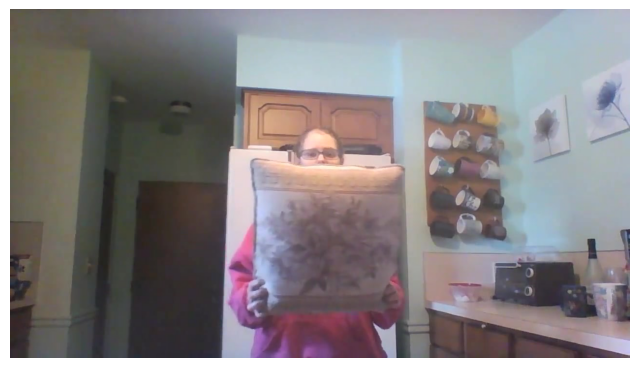

In [211]:
# load and display image
dataDir='../data/tao_train/frames'

I = io.imread('%s/%s'%(dataDir,img['file_name']))

plt.axis('off')
plt.imshow(I)
plt.show()

ImgID:  82829
AnnotationID:  [307208]
Annotations:  [{'segmentation': [[449, 243, 814, 243, 814, 720, 449, 720]], 'bbox': [449.0, 243.0, 365.0, 477.0], 'area': 174105, 'iscrowd': 0, 'id': 307208, 'image_id': 82829, 'category_id': 805, 'track_id': 13483, '_scale_uuid': 'e7a4ae3c-5fea-450e-99c9-fdd86277884f', 'scale_category': 'person', 'video_id': 2178, 'instance_id': 13483}]


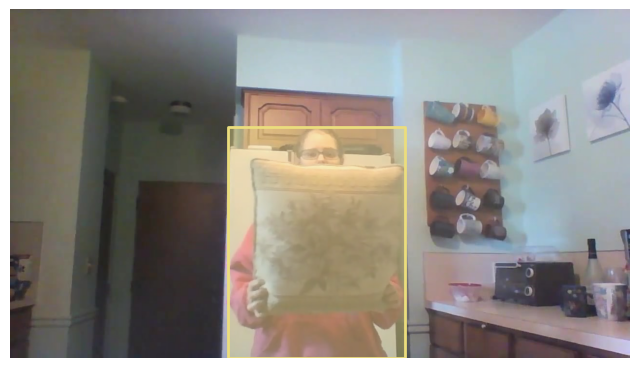

In [212]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
print("ImgID: ",img['id'])
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd= None)
print("AnnotationID: ",annIds)
anns = coco.loadAnns(annIds)
print("Annotations: ",anns)
coco.showAnns(anns)

In [176]:
# WE DONT HAVE ANY OF THESE ANNOTATIONS - DO WE NEED?
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '../data/tao_train/frames/annotations/person_keypoints_train_482_classes_updated.json'

In [ ]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [ ]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

In [ ]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()